In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!kaggle datasets download -d shahkarshah/aids-classification

Dataset URL: https://www.kaggle.com/datasets/shahkarshah/aids-classification
License(s): apache-2.0
 88% 1.00M/1.13M [00:00<00:00, 1.98MB/s]
100% 1.13M/1.13M [00:00<00:00, 2.23MB/s]


In [ ]:
!unzip /content/aids-classification.zip

Archive:  /content/aids-classification.zip
  inflating: AIDS_Classification_50000.csv  


In [ ]:
df = pd.read_csv('/content/AIDS_Classification_50000.csv')
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


In [ ]:
df.isna().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


In [ ]:
df.drop(['time', 'trt', 'z30', 'preanti', 'str2', 'strat', 'treat', 'offtrt', ], axis = 1, inplace = True)

In [ ]:
X, y = df.drop(['infected'], axis = 1), df['infected']

In [ ]:
np.sqrt(df)

,age,wtkg,hemo,homo,drugs,karnof,oprior,race,gender,symptom,cd40,cd420,cd80,cd820,infected
0,6.082763,8.914224,0.0,1.0,0.0,10.000000,0.0,0.0,1.0,0.0,17.944358,21.656408,29.698485,27.459060,1.0
1,5.744563,8.545358,0.0,1.0,0.0,9.486833,0.0,0.0,1.0,1.0,12.961481,23.979158,32.171416,39.051248,1.0
2,6.557439,8.335342,0.0,1.0,0.0,10.000000,0.0,0.0,0.0,0.0,19.416488,18.248288,33.867388,32.984845,1.0
3,6.480741,9.442422,0.0,1.0,0.0,10.000000,1.0,0.0,1.0,0.0,15.427249,18.000000,27.838822,31.921779,1.0
4,6.082763,11.724581,0.0,1.0,0.0,10.000000,0.0,0.0,1.0,0.0,22.360680,21.047565,40.012498,29.137605,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6.782330,7.828285,0.0,0.0,0.0,9.486833,0.0,0.0,0.0,0.0,15.297059,20.049938,21.931712,31.843367,0.0
49996,6.480741,8.565494,0.0,1.0,0.0,10.000000,0.0,1.0,1.0,0.0,19.209373,23.979158,22.671568,25.632011,0.0
49997,6.324555,8.874584,0.0,1.0,0.0,10.000000,0.0,0.0,1.0,0.0,17.549929,25.748786,39.761791,29.376862,0.0
49998,5.567764,7.225213,0.0,0.0,0.0,10.000000,0.0,1.0,0.0,0.0,18.681542,20.976177,21.679483,29.410882,1.0


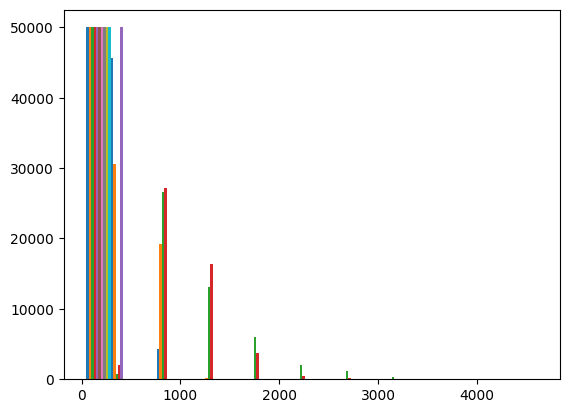

In [ ]:
plt.hist(df, bins=10)
plt.show()

In [ ]:
df['infected'].skew()

0.821051847857533

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


# Logistic Regression modeli qur
model = LogisticRegression()
model.fit(X, y)

# Proqnozlaşdırma (çıxış ehtimalları)
proba = model.predict_proba(X[:5])  # Ehtimallar
pred = model.predict(X[:100])        # Proqnozlar

print("Ehtimallar:", proba)
print("Proqnozlar:", pred)

In [ ]:
# Sinif çəkilərini əl ilə təyin et
class_weights = {0: 2, 1: 1}  # Azlıq sinfinə daha çox çəki verilir
model = LogisticRegression(class_weight=class_weights)
model.fit(X_train, y_train)

# Proqnoz və hesabat
y_pred = model.predict(X_test)
# print(classification_report(y_test, y_pred))
model.score(X_train, y_train), model.score(X_test, y_test)

NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)
np.bincount(y_train)
np.bincount(y_res)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_res, y_res)

y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(classification_report(X_res, y_res))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
sgd_clf = SGDClassifier(random_state=42)

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3).mean()

In [ ]:
cross_val_score(sgd_clf, X_test, y_test, cv = 3).mean()

In [ ]:
from sklearn.metrics import classification_report
model = LogisticRegression(class_weight='balanced')  # Avtomatik olaraq çəkilər təyin edir
model.fit(X_train, y_train)

# Modelin proqnozlaşdırması
y_pred = model.predict(X_test)

# Performansı qiymətləndir
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


In [ ]:
weights = {0: 1, 1: 3}  # Azlıq sinfinə daha çox çəki verilir.
model = LogisticRegression(class_weight=weights)
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('scale', StandardScaler())
])


cat_pipeline =Pipeline([
    ('impute', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
    ('onehot', OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder = 'passthrough')

In [ ]:
transformer.fit(X_train)

In [ ]:
X_train_transformed_df = pd.DataFrame(data = transformer.transform(X_train), columns = transformer.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(data = transformer.transform(X_test), columns = transformer.get_feature_names_out())

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train_transformed_df, y_train)

In [ ]:
rfc.score(X_train_transformed_df, y_train), rfc.score(X_test_transformed_df, y_test)